## Final Project Submission

Please fill out:
* Student name: Stepan Grigroya
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name:  
* Blog post URL:


# SyriaTel Customer Churn

## Business Problem

The telecomunications industry seeks to minimize financial losses stemming from customers who have a short tenure and discontinue their services prematurely.

In [1]:
# importnig libraries
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB, BaseEstimator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier,BaseEnsemble,BaggingClassifier,AdaBoostClassifier
from sklearn.metrics import confusion_matrix, make_scorer, recall_score,ConfusionMatrixDisplay,classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,roc_auc_score, plot_roc_curve
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline, Pipeline



%matplotlib inline


In [2]:
# reading the csv file
data=pd.read_csv("Telecom_dataset.csv", )
# setting the maximum number of columns to display as unlimited
pd.set_option('max_columns', None)
# setting the maximum number of rows to display as unlimited
pd.set_option("max_rows", None)
# displaying the first few rows of the data
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# display the column names of the dataframe
data.columns


Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [4]:
# dropping the 'area code' and 'phone number' columns from the dataframe
data.drop(columns=['area code','phone number'], inplace=True)

In [5]:
# displaying the first few rows of the data
data.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
# converting data frame columns into a list
list(data.columns)

['state',
 'account length',
 'international plan',
 'voice mail plan',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'customer service calls',
 'churn']

In [7]:
# displayinf information about dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   international plan      3333 non-null   object 
 3   voice mail plan         3333 non-null   object 
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-null   

In [8]:
# Calculating the sum of missing values in each column
data.isna().sum()

state                     0
account length            0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [9]:
# Calculating the sum of duplicated rows
data.duplicated().sum()

0

In [10]:
# iterating over the columns of tha dataframe and printing the unique values
for i in data.columns:
    print(i)
    print(data[i].unique())
    print('*************************')
    

state
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
*************************
account length
[128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27

In [11]:
# descriptive statistic for dataframe and transposing the result
data.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00
total night calls,3333.0,100.107711,19.568609,33.00,87.00,100.00,113.00,175.00


In [12]:
# descriptive statistic for the (object) columns 
data.describe(include=[object])

,state,international plan,voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,no,no
freq,106,3010,2411


Churn balance check

In [13]:
# counting the occurence of true and false in the 'churn' columns
data['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [14]:
# calculating the percentage of each unique value in the 'churn' column
print( (data['churn'].value_counts(normalize=True))*100 )

False    85.508551
True     14.491449
Name: churn, dtype: float64


<AxesSubplot:xlabel='churn', ylabel='count'>

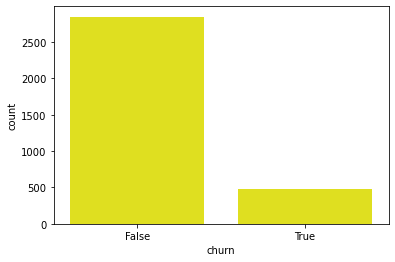

In [15]:
# creating a count plot to visualize distribution of the 'churn' column
sns.countplot(x=data.churn, color = 'yellow')

The dataset has a significantly imbalanced between classes. One class has significantly fewer samples than the other. We can have challenge for classification algorithms. It can negatively affect the performance of classification model. Our model will tend to predict the majority class more frequently. Accuracy may be high but it not reflect models ability to predict the minority class accurately. To address this class imbalance we can use resampling techniques to oversample minority class (SMOT).

Churn count by state

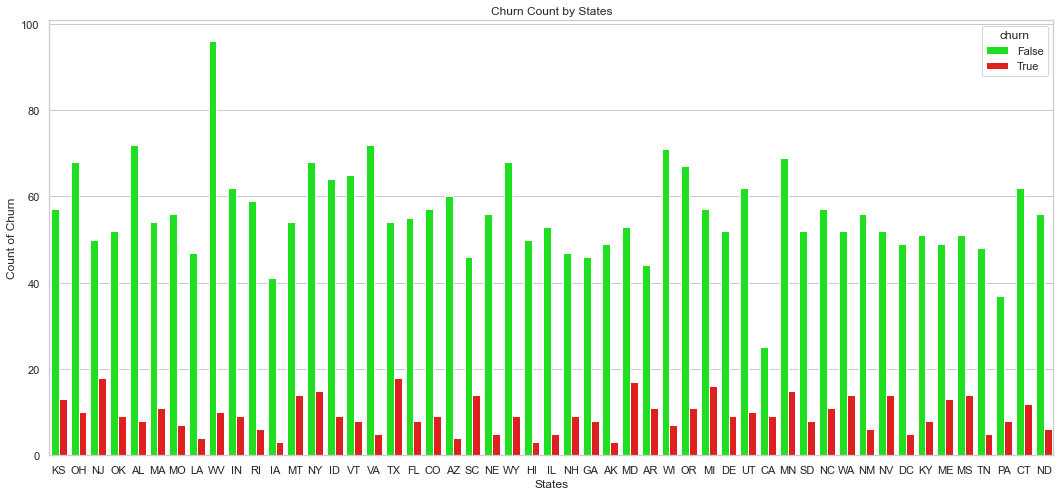

In [16]:
# creating count plot with hue by 'state' 
sns.set(style='whitegrid')
plt.figure(figsize=(18,8))
custom_palette = ['#00FF00','#FF0000']
ax=sns.countplot(x='state', hue='churn', data=data, palette=custom_palette)
plt.xlabel('States')
plt.ylabel('Count of Churn')
plt.title('Churn Count by States')

plt.show()


Examining customer churn rate from telecom by each state in the USA requires a comprehensive analysis of different factors that may influence customer behavior. We need the factor of competition. States with a high number of telecom providers who offer the same services will be competitive. As customers have more options to choose. So, telecom must improve services to lower churn rate. Factor of network quality: the quality of network coverage can influence customer satisfaction and churn rate. States with widespread network infrastructure are likely to have lower churn rates. Population Mobility: States with a significant number of tourists may experience higher churn rates. Socioeconomic factors: income level and population density can also influence churn rate.

In the future our data science team would recommend providing us data about following factors to analyze feature importance. Also, we will combine available information for socioeconomics and population mobility to analyze each state separately.


In [17]:
# highest top 10 states with highest churn rate
top_churn = ( ((data.groupby('state'))['churn'].mean())*100 ).sort_values(ascending=False).head(10).round(2)
top_churn

state
NJ    26.47
CA    26.47
TX    25.00
MD    24.29
SC    23.33
MI    21.92
MS    21.54
NV    21.21
WA    21.21
ME    20.97
Name: churn, dtype: float64

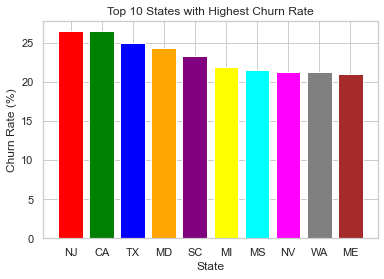

In [18]:
# Define the colors for the bars
colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'gray', 'brown']

# Create a bar plot with colors
plt.bar(top_churn.index, top_churn.values, color=colors)

# Set the labels and title
plt.xlabel('State')
plt.ylabel('Churn Rate (%)')
plt.title('Top 10 States with Highest Churn Rate')

plt.xticks(rotation=0)

# Display the plot
plt.show()

<AxesSubplot:xlabel='account length', ylabel='Density'>

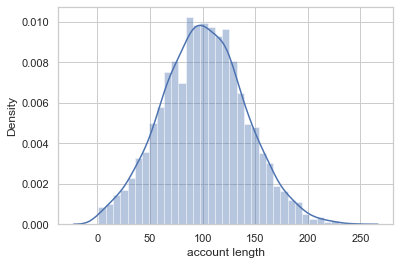

In [19]:
# cretting distribution plo to visualize distribution of the 'account length' column
sns.distplot(data['account length'])

International plan

In [20]:
# Counting the occurrences of each unique value in the 'international plan' column
data['international plan'].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

In [21]:
# unique values in the 'international plan' column
data['international plan'].unique()

array(['no', 'yes'], dtype=object)

In [22]:
# calculating the percentage of churn for each category in the 'international plan' column
int_plan = pd.crosstab(data['international plan'], data['churn'])
int_plan['percentage churn']=int_plan.apply(lambda x: x[1]*100/(x[0]+x[1]), axis=1)
int_plan

churn,False,True,percentage churn
international plan,,,
no,2664,346,11.495017
yes,186,137,42.414861


There are 323 customers with international plan from which 42% churn <br>
There are 3010 customers without international plan from which 11% churn <br>
People with international plan churn more than people without international plan <br>


There can be several reasons why cutomers with international plan may churn more compared to those without international plan. International plans comes with additional charges and extra cost can make the bill higher for customers with international plans. Some customers may find altenative options for international communication that are more cost effective such as WhatsApp.

<AxesSubplot:xlabel='international plan', ylabel='count'>

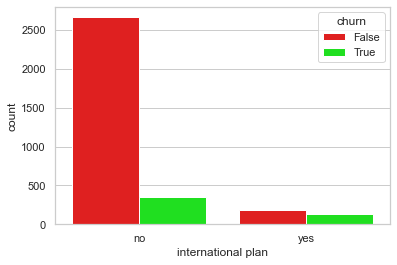

In [23]:
# creating a count plot to visualize the distribution of churn based on 'international plan' column

colors = ['#FF0000', '#00FF00']
sns.countplot(x='international plan', hue='churn', data=data, palette=colors)


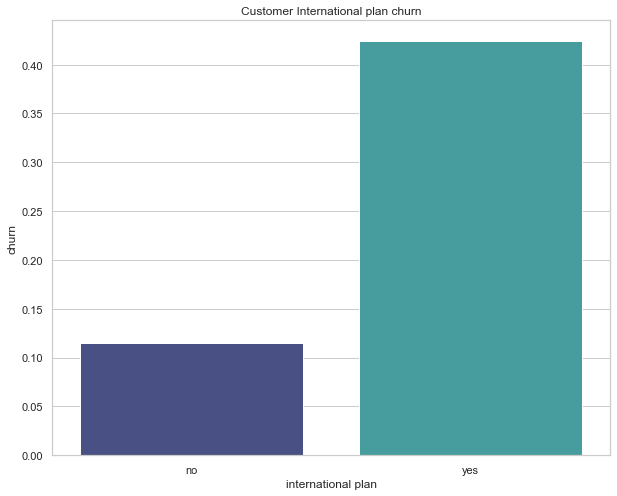

In [24]:
# creating the bar plot to visualize the churn rate based on the 'international plan' column
plt.figure(figsize=(10, 8))
splot = sns.barplot(x='international plan', y='churn', data=data, palette='mako', ci=None)
plt.title('Customer International plan churn')
plt.show()

Voice mail plan

In [25]:
# Counting the occurrences of each unique value in the 'voice mail plan' column
data['voice mail plan'].value_counts()


no     2411
yes     922
Name: voice mail plan, dtype: int64

In [26]:
# unique values in the 'international plan' column
data['voice mail plan'].unique()

array(['yes', 'no'], dtype=object)

In [27]:
# calculating the percentage of churn for each category in the 'voice mail plan' column
voice_plan = pd.crosstab(data['voice mail plan'], data['churn'])
voice_plan['percentage churn']=int_plan.apply(lambda x: x[1]*100/(x[0]+x[1]), axis=1)
voice_plan

churn,False,True,percentage churn
voice mail plan,,,
no,2008,403,11.495017
yes,842,80,42.414861


<AxesSubplot:xlabel='voice mail plan', ylabel='count'>

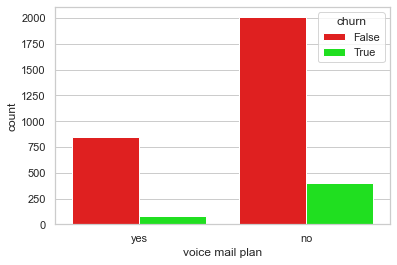

In [28]:
# creating a count plot to visualize the distribution of churn based on 'voice mail plan' column

colors = ['#FF0000', '#00FF00']
sns.countplot(x='voice mail plan',hue='churn', data=data, palette=colors)

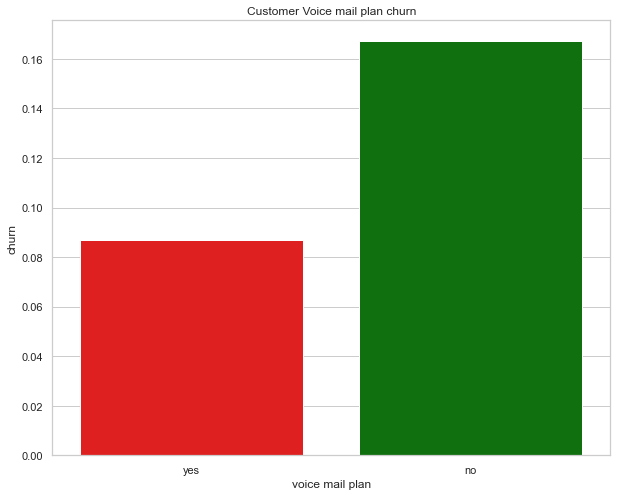

In [29]:
# creating the bar plot to visualize the churn rate based on the 'voice mail plan' column

palette=['red', 'green']
plt.figure(figsize=(10, 8))
splot = sns.barplot(x='voice mail plan', y='churn', data=data, palette=['red', 'green'], ci=None)
plt.title('Customer Voice mail plan churn')
plt.show()


##  Customer service call

In [30]:
# Counting the occurrences of each unique value in the 'customer service calls' column
data['customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
8       2
9       2
Name: customer service calls, dtype: int64

In [31]:
# unique values in the 'customer service calls' column
data['customer service calls'].unique()

array([1, 0, 2, 3, 4, 5, 7, 9, 6, 8], dtype=int64)

In [32]:
# Calculating the count of churn for each unique value in the 'customer service calls' column
cust_call=data.groupby('customer service calls')['churn'].agg(['count'])
cust_call

,count
customer service calls,
0,697
1,1181
2,759
3,429
4,166
5,66
6,22
7,9
8,2


In [33]:
# calculating the percentage of churn for each category in the 'customer service calls' column

service_call=pd.crosstab(data['customer service calls'],data['churn'])
service_call['percentage churn']=service_call.apply(lambda x: x[1]*100/(x[0]+x[1]), axis=1)
service_call

churn,False,True,percentage churn
customer service calls,,,
0,605,92,13.199426
1,1059,122,10.330229
2,672,87,11.462451
3,385,44,10.256410
4,90,76,45.783133
5,26,40,60.606061
6,8,14,63.636364
7,4,5,55.555556
8,1,1,50.000000


Telecom customers who frequently make service calls tend to churn more especially after 4 service call. This can be couple of factors customers who experience persistent service issues or technical problems may become frustrated with the telecom provider's inability to resolve their concerns effectively. Customer who frequently require assistance may feel that company customer support is inadequate to solve problem thus customer will lose trust and satisfaction.

In a future we would recommend to collect data about service call complain to analyse the churn rate.

<AxesSubplot:xlabel='customer service calls', ylabel='count'>

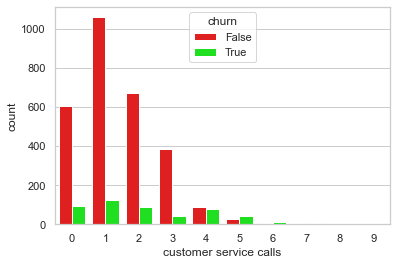

In [34]:
# # creating a count plot to visualize the distribution of churn based on 'customer service calls' column

colors = ['#FF0000', '#00FF00']
sns.countplot(x='customer service calls',hue='churn', data=data, palette=colors)

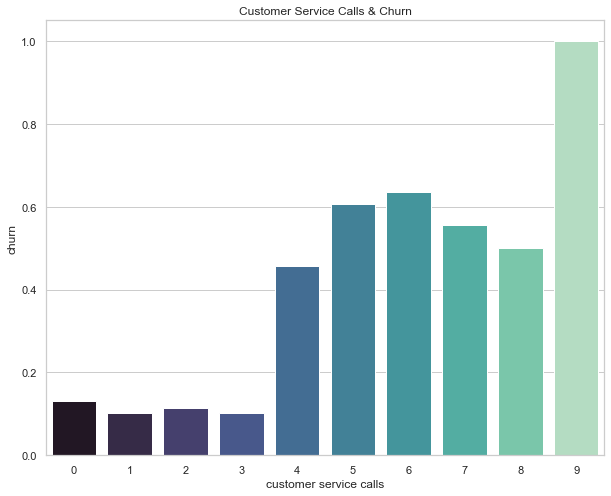

In [35]:
# creating the bar plot to visualize the churn rate based on the 'customer service calls' column

plt.figure(figsize=(10, 8))
splot = sns.barplot(x='customer service calls', y='churn',data=data, palette='mako', ci=None)
plt.title('Customer Service Calls & Churn')
plt.show()

Correlation


Let's use correlation matrix statistical tool to measure the relationship between variables in dataset. It will calculate correlation coefficient.

<AxesSubplot:>

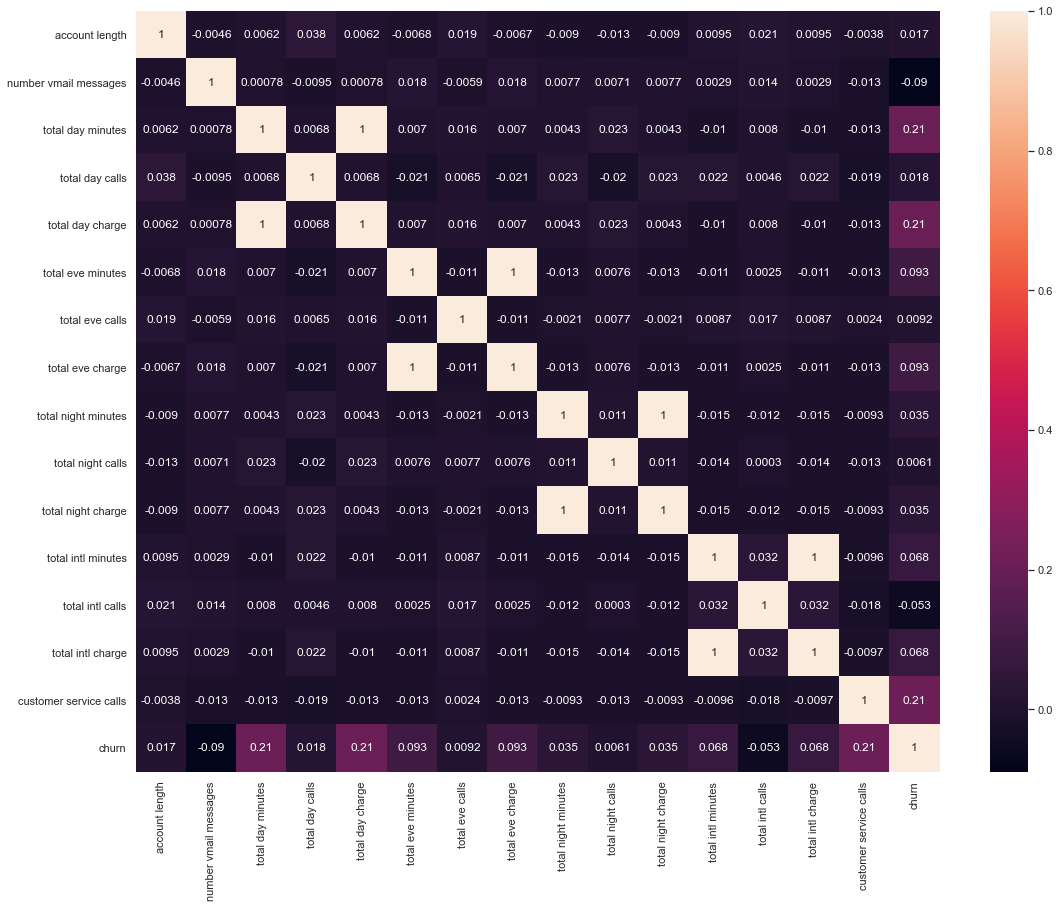

In [36]:
# creating a correlation heatmap to visualize the correlation between variables
corr = data.corr()
f, ax = plt.subplots(figsize=(18, 14))
sns.heatmap(corr, annot=True)

Values  yes and no in a dataset will be replaced with 1 and 0. 

In [37]:
# Mapping dictionary
mapping = {'yes': 1, 'no': 0}

# Apply mapping to the dataframe
data = data.replace(mapping)

data.head()


,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [38]:
# Converting the 'churn' column to integer type

data['churn'] = data['churn'].astype(int)
data.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [39]:
# displayinf information about dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   international plan      3333 non-null   int64  
 3   voice mail plan         3333 non-null   int64  
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-null   

# Model

In [40]:
# # Splitting the data into target variable 'y' (churn) and feature variables 'X' (excluding 'churn' and 'state' columns)

y=data['churn']
X=data.drop(['churn', 'state'], axis=1)

The proportion of the data to be allocated to the testing set is 20%

In [41]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
# Displaying the first few rows of the training set feature variables
X_train.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
817,243,0,0,0,95.5,92,16.24,163.7,63,13.91,264.2,118,11.89,6.6,6,1.78,2
1373,108,0,0,0,112.0,105,19.04,193.7,110,16.46,208.9,93,9.40,4.1,4,1.11,4
679,75,1,0,0,222.4,78,37.81,327.0,111,27.80,208.0,104,9.36,8.7,9,2.35,1
56,141,0,0,0,126.9,98,21.57,180.0,62,15.30,140.8,128,6.34,8.0,2,2.16,1
1993,86,0,0,0,216.3,96,36.77,266.3,77,22.64,214.0,110,9.63,4.5,3,1.22,0


In [43]:
# Displaying the first few rows of the training set target variable
y_train.head()

817     0
1373    1
679     1
56      0
1993    0
Name: churn, dtype: int32

In [44]:
# Displaying the first few rows of the testing set feature variables

X_test.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
438,113,0,0,0,155.0,93,26.35,330.6,106,28.10,189.4,123,8.52,13.5,3,3.65,1
2674,67,0,0,0,109.1,117,18.55,217.4,124,18.48,188.4,141,8.48,12.8,6,3.46,0
1345,98,0,0,0,0.0,0,0.00,159.6,130,13.57,167.1,88,7.52,6.8,1,1.84,4
1957,147,0,0,0,212.8,79,36.18,204.1,91,17.35,156.2,113,7.03,10.2,2,2.75,1
2148,96,0,0,0,144.0,102,24.48,224.7,73,19.10,227.7,91,10.25,10.0,7,2.70,1


In [45]:
# Displaying the first few rows of the training set target variable

y_test.head()

438     0
2674    0
1345    1
1957    0
2148    0
Name: churn, dtype: int32

In [46]:
# Displaying the shape of the training and testing sets' feature variables

X_train.shape, X_test.shape

((2666, 17), (667, 17))

In [47]:
# # Scaling the training and testing sets' feature variables using StandardScaler

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [48]:
# Displaying the scaled training set feature variables 
X_train_scaled

array([[ 3.60138166, -0.32662405, -0.61116185, ...,  0.63484856,
        -1.30413226,  0.31897761],
       [ 0.18495105, -0.32662405, -0.61116185, ..., -0.18437035,
        -2.19152464,  1.81351945],
       [-0.65017643,  3.06162389, -0.61116185, ...,  1.86367691,
        -0.5491865 , -0.42829331],
       ...,
       [-0.87793847, -0.32662405, -0.61116185, ...,  0.22523911,
        -0.37700589, -0.42829331],
       [ 1.72867155, -0.32662405, -0.61116185, ...,  0.63484856,
        -0.1253573 ,  0.31897761],
       [-1.63714527, -0.32662405,  1.63622779, ...,  0.63484856,
        -0.58892049,  0.31897761]])

In [49]:
# Displaying the scaled testing set feature variables 

X_test_scaled

array([[ 0.31148552, -0.32662405, -0.61116185, ..., -0.5939798 ,
         1.17261961, -0.42829331],
       [-0.85263157, -0.32662405, -0.61116185, ...,  0.63484856,
         0.92097103, -1.17556423],
       [-0.06811788, -0.32662405, -0.61116185, ..., -1.4131987 ,
        -1.22466428,  1.81351945],
       ...,
       [ 1.19722679, -0.32662405,  1.63622779, ..., -0.5939798 ,
        -0.1253573 , -0.42829331],
       [-0.65017643, -0.32662405,  1.63622779, ...,  1.04445801,
        -2.16503531,  1.06624853],
       [ 0.08372348, -0.32662405, -0.61116185, ...,  1.45406746,
         0.16602527, -0.42829331]])

In [50]:
# Calculating the normalized value counts of the training set target variable
y_train.value_counts(normalize=True)

0    0.856714
1    0.143286
Name: churn, dtype: float64

In [51]:
# Calculating the normalized value counts of the testing set target variable
y_test.value_counts(normalize=True)

0    0.848576
1    0.151424
Name: churn, dtype: float64

### Logistic Regression (baseline)

In [52]:
# Fitting a logistic regression model to the scaled training set

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

In [53]:
# Making predictions on the scaled testing set using the logistic regression model
y_preds_test_log = logreg.predict(X_test_scaled)
# Making predictions on the scaled training set using the logistic regression model
y_preds_train_log = logreg.predict(X_train_scaled)

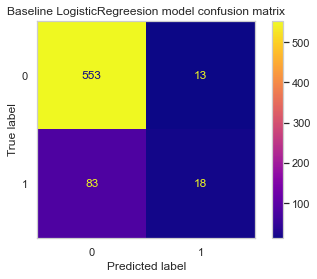

In [54]:
# Plotting confusion matrix
fig, ax = plt.subplots()

ct=confusion_matrix(y_test, y_preds_test_log)
disp = ConfusionMatrixDisplay(ct)
disp = disp.plot(include_values = True, ax =ax,  cmap = 'plasma' )
ax.set_title('Baseline LogisticRegreesion model confusion matrix')
plt.grid(False)
plt.show()








In [55]:
# Calculating the accuracy score of the logistic regression model's predictions on the scaled testing set

accuracy_score(y_test, y_preds_test_log)


0.856071964017991

In [56]:
# Calculating the precision score of the logistic regression model's predictions on the scaled testing set

precision_score(y_test, y_preds_test_log)


0.5806451612903226

In [57]:
# Calculating the recal score of the logistic regression model's predictions on the scaled testing set

recall_score(y_test, y_preds_test_log)

0.1782178217821782

In [58]:
# Calculating the f1 score of the logistic regression model's predictions on the scaled testing set

f1_score(y_test, y_preds_test_log)


0.2727272727272727

In [59]:
# Obtaining the predicted probabilities for each class using the logistic regression model

logreg.predict_proba(X_test_scaled)

array([[0.83643834, 0.16356166],
       [0.97790893, 0.02209107],
       [0.96776498, 0.03223502],
       ...,
       [0.97727374, 0.02272626],
       [0.98289345, 0.01710655],
       [0.96966391, 0.03033609]])

let's see from the logistic regression model's predicted probabilities

In [60]:
# Extracting the predicted probabilities of the positive class 
test_probas = logreg.predict_proba(X_test_scaled)[:,1]


In [61]:
# Calculating the ROC AUC score using the true labels and predicted probabilities

roc_auc_score(y_test, test_probas)

0.8330301228002659

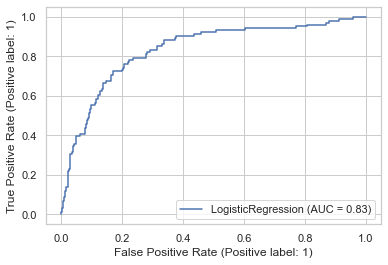

In [62]:
# Plotting the ROC curve using the logistic regression model

plot_roc_curve(logreg, X_test_scaled, y_test);

### Decission Tree

In [63]:
# Defining the list of features
features = ['account length', 'international plan', 'voice mail plan', 'number vmail messages',
            'total day charge', 'total eve charge', 'total night charge', 'total intl charge',
            'customer service calls']
# definig target variable
target = ['churn']    

In [64]:
# Fitting a decision tree classifier to the training set

dec_tree = DecisionTreeClassifier(criterion='gini', random_state=42)
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

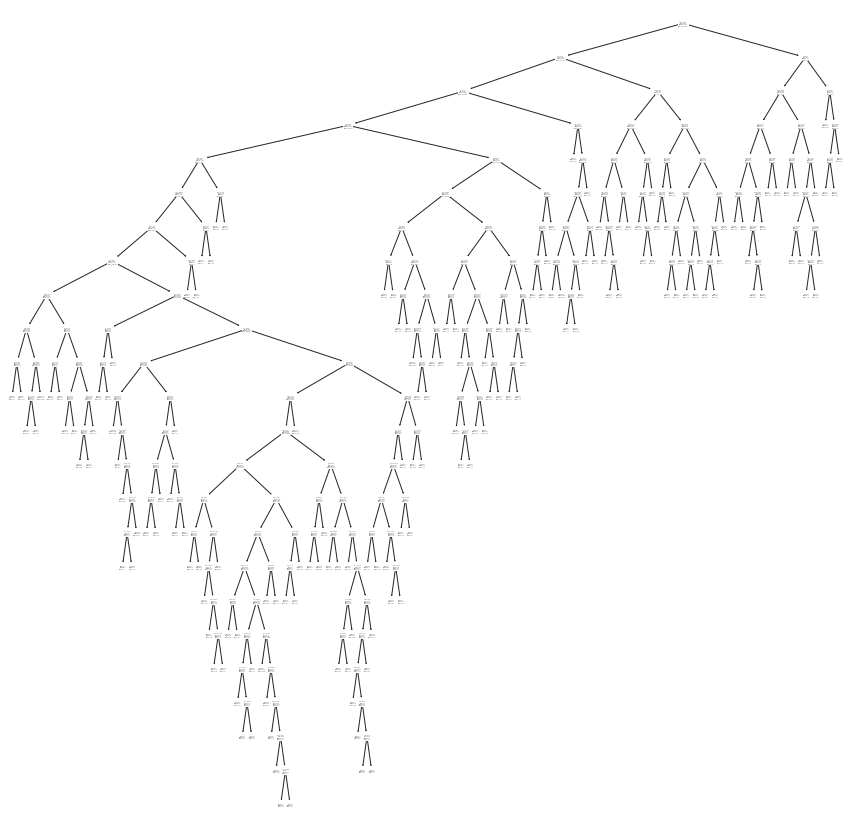

In [65]:
# Plot the Decision Tree
plt.figure(figsize=(15, 15))
plot_tree(dec_tree)
plt.show()


In [72]:
# Calculating the accuracy score of the decision tree classifier on the training set

dec_tree.score(X_train, y_train)

1.0

In [73]:
# Making predictions on the testing set using the decision tree classifier

y_preds_test_dec = dec_tree.predict(X_test)
y_preds_test_dec

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [74]:
# Calculating the accuracy score of the decision tree classifier's predictions on the testing set

accuracy_score(y_test, y_preds_test_dec)


0.9235382308845578

In [75]:
# Calculating the precision score of the decision tree classifier's predictions on the testing set

precision_score(y_test, y_preds_test_dec)


0.7551020408163265

In [76]:
# Calculating the recall score of the decision tree classifier's predictions on the testing set

recall_score(y_test, y_preds_test_dec)

0.7326732673267327

In [77]:
# Iterating over the feature importances and features
for fimp, feature in zip(dec_tree.feature_importances_, features):
    print(fimp, feature)

0.023388233372354288 account length
0.07890033367430306 international plan
0.057147151681600894 voice mail plan
0.00276124720545193 number vmail messages
0.11308123082607309 total day charge
0.02332459837653115 total eve charge
0.16027943646183188 total night charge
0.09502711829400895 total intl charge
0.03538969656590861 customer service calls


## KNN

trying knn with different features this time droping some features

In [78]:
# Defining the list of features
features = ['account length', 'international plan', 'voice mail plan', 'number vmail messages',
            'total day charge', 'total eve charge', 'total night charge', 'total intl charge',
            'customer service calls']
# definig target variable
target = ['churn']                                  

In [79]:
X = data[features]
y = data[target]

In [80]:
# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [81]:
## Creating an instance of StandardScaler
ss_knn = StandardScaler()
# Scaling the feature variables for KNN
X_train_scaled_knn = ss.fit_transform(X_train)
X_test_scaled_knn = ss.transform(X_test)

In [82]:
# Creating an instance of KNeighborsClassifier and fitting it to the scaled training set
knn = KNeighborsClassifier().fit(X_train_scaled_knn, y_train)


In [83]:
# Calculating cross-validated scores of the KNN classifier
scores = cross_val_score(knn, X_train_scaled_knn, y_train)

In [84]:
# Calculating the mean accuracy score of the KNN classifier on the scaled testing set

knn.score(X_test_scaled_knn, y_test)   

0.9115442278860569

In [85]:
# Calculate the accuracy score on the scaled testing set
knn.score(X_test_scaled_knn, y_test)

0.9115442278860569

## GridSearch

In [86]:
grid = {
      'n_neighbors' : [1,3,5],
      'metric' : ['minkowski', 'manhattan'],
      'weights' : ['uniform', 'distance']
        }

In [87]:
# Creating an instance of KNeighborsClassifier
knn_1 = KNeighborsClassifier()

In [88]:
# Creating an instance of GridSearchCV for hyperparameter tuning
grsearch = GridSearchCV(estimator = knn_1, param_grid = grid, verbose=2)

In [89]:
grsearch.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ...metric=minkowski, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=3, wei

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': [1, 3, 5],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [90]:
# Making predictions using the trained GridSearchCV model
y_pred_knn = grsearch.predict(X_test_scaled)
y_pred_knn_prob = grsearch.predict_proba(X_test_scaled)

print(y_pred_knn)
print(y_pred_knn_prob)


[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 

In [91]:
print('KNN best parameters',grsearch.best_params_)

KNN best parameters {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}


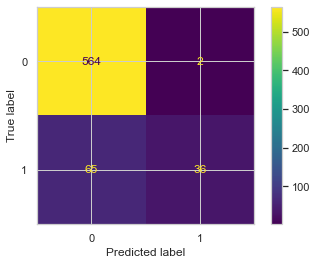

In [92]:
# plot model evaluation
cm =confusion_matrix(y_test,y_pred_knn);
ConfusionMatrixDisplay(cm).plot()

In [93]:
# Accessing the best estimator from the grid search
grsearch.best_estimator_

KNeighborsClassifier(metric='manhattan')

In [94]:
# Accessing the results of the grid search
grsearch.cv_results_

{'mean_fit_time': array([0.00442576, 0.00285201, 0.00454278, 0.00161409, 0.00424614,
        0.00563569, 0.00380549, 0.00628986, 0.00495858, 0.00210834,
        0.00501413, 0.00332098]),
 'std_fit_time': array([0.00318135, 0.00393895, 0.00467521, 0.00322819, 0.0039649 ,
        0.00324579, 0.00392021, 0.00407923, 0.00626114, 0.0026926 ,
        0.00447396, 0.00433281]),
 'mean_score_time': array([0.04186754, 0.01457005, 0.04554558, 0.02415867, 0.05382576,
        0.05611043, 0.05811472, 0.02329631, 0.04398208, 0.03278451,
        0.05046   , 0.04567485]),
 'std_score_time': array([0.01328749, 0.00489703, 0.00487655, 0.00502814, 0.00809275,
        0.02153116, 0.01445652, 0.00973222, 0.00885749, 0.010887  ,
        0.02079779, 0.01068518]),
 'param_metric': masked_array(data=['minkowski', 'minkowski', 'minkowski', 'minkowski',
                    'minkowski', 'minkowski', 'manhattan', 'manhattan',
                    'manhattan', 'manhattan', 'manhattan', 'manhattan'],
              mas

In [95]:
# Converting grid search results to a DataFrame
pd.DataFrame(grsearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004426,0.003181,0.041868,0.013287,minkowski,1,uniform,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei...",0.850187,0.864916,0.861163,0.855535,0.870544,0.860469,0.007097,11
1,0.002852,0.003939,0.014570,0.004897,minkowski,1,distance,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei...",0.850187,0.864916,0.861163,0.855535,0.870544,0.860469,0.007097,11
2,0.004543,0.004675,0.045546,0.004877,minkowski,3,uniform,"{'metric': 'minkowski', 'n_neighbors': 3, 'wei...",0.883895,0.885553,0.891182,0.887430,0.900563,0.889725,0.005937,3
3,0.001614,0.003228,0.024159,0.005028,minkowski,3,distance,"{'metric': 'minkowski', 'n_neighbors': 3, 'wei...",0.883895,0.885553,0.891182,0.887430,0.898687,0.889349,0.005261,4
4,0.004246,0.003965,0.053826,0.008093,minkowski,5,uniform,"{'metric': 'minkowski', 'n_neighbors': 5, 'wei...",0.876404,0.891182,0.889306,0.885553,0.900563,0.888602,0.007852,6
5,0.005636,0.003246,0.056110,0.021531,minkowski,5,distance,"{'metric': 'minkowski', 'n_neighbors': 5, 'wei...",0.876404,0.891182,0.889306,0.885553,0.900563,0.888602,0.007852,6
6,0.003805,0.003920,0.058115,0.014457,manhattan,1,uniform,"{'metric': 'manhattan', 'n_neighbors': 1, 'wei...",0.874532,0.879925,0.872420,0.846154,0.849906,0.864587,0.013790,9
7,0.006290,0.004079,0.023296,0.009732,manhattan,1,distance,"{'metric': 'manhattan', 'n_neighbors': 1, 'wei...",0.874532,0.879925,0.872420,0.846154,0.849906,0.864587,0.013790,9
8,0.004959,0.006261,0.043982,0.008857,manhattan,3,uniform,"{'metric': 'manhattan', 'n_neighbors': 3, 'wei...",0.891386,0.896811,0.898687,0.883677,0.876173,0.889347,0.008400,5
9,0.002108,0.002693,0.032785,0.010887,manhattan,3,distance,"{'metric': 'manhattan', 'n_neighbors': 3, 'wei...",0.889513,0.896811,0.898687,0.883677,0.874296,0.888597,0.008931,8


In [96]:
# Calculating the accuracy score of the best estimator on the test data
grsearch.best_estimator_.score(X_test_scaled, y_test)

0.8995502248875562

# Naive Bayes Classifier

In [97]:
# Creating an instance of Gaussian Naive Bayes classifier
gnb = GaussianNB()

In [98]:
# Training the Gaussian Naive Bayes classifier on the training data
gnb.fit(X_train,y_train)

GaussianNB()

In [99]:
# Making predictions using the trained Gaussian Naive Bayes classifier
y_preds_test = gnb.predict(X_test)
y_preds_train = gnb. predict(X_train)

In [100]:
recall_score(y_train, y_preds_train)

0.43455497382198954

In [101]:
recall_score(y_test, y_preds_test)

0.3465346534653465

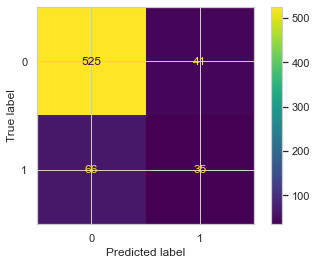

In [102]:
# plotting model evaluation

ct =confusion_matrix(y_test,y_preds_test);
ConfusionMatrixDisplay(ct).plot()


## Build a Pipeline



Pipeline for DecisionTree

In [103]:
features = ['account length', 'international plan', 'voice mail plan', 'number vmail messages',
                   'total day charge', 'total eve charge', 'total night charge', 'total intl charge',
                   'customer service calls']
target = ['churn']  

X = data[features]
y = data[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:

scaled_pipeline_1 = Pipeline( [  ('ss', StandardScaler()),
                                 ('smote', SMOTE()),
                                 (('rf_clf', DecisionTreeClassifier(random_state=42)))
                              ]   )
# Train the pipeline (tranformations & predictor)
scaled_pipeline_1.fit(X_train, y_train)

# Predict using the pipeline (includes the transfomers & trained predictor)
predicted = scaled_pipeline_1.predict(X_test)
print(predicted)


[0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0
 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0
 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 

In [105]:
# Fit the training data to pipeline
scaled_pipeline_1.fit(X_train, y_train)

# Print the accuracy on test set
scaled_pipeline_1.score(X_test, y_test)

0.8680659670164917

Pipelin for RandomForest

In [106]:
# Build a pipeline with StandardScaler and RandomForestClassifier

scaled_pipeline_2 = Pipeline(  [('ss', StandardScaler()), 
                               ('RF', RandomForestClassifier(random_state=123))])

In [107]:
# Define the grid
grid = [{'RF__max_depth': [4, 5, 6], 
         'RF__min_samples_split': [2, 5, 10], 
         'RF__min_samples_leaf': [1, 3, 5]}]

In [108]:
# Define a grid search
gridsearch = GridSearchCV(estimator=scaled_pipeline_2, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=5)

In [109]:
# Fit the training data
gridsearch.fit(X_train, y_train)

# Print the accuracy on test set
gridsearch.score(X_test, y_test)

0.9220389805097451

Pipeline for DecisionTree with SMOT

In [110]:
features = ['account length', 'international plan', 'voice mail plan', 'number vmail messages',
            'total day charge', 'total eve charge', 'total night charge', 'total intl charge',
            'customer service calls']
target = ['churn']  

X = data[features]
y = data[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
pipeline_1 = Pipeline( [  ('ss', StandardScaler()),
                          ('smote', SMOTE()),
                          ('dt_clf', DecisionTreeClassifier(random_state=42))      
                              
                              
                         ]   )

In [112]:
# Instantiate and fit a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [113]:
# Feature importance
tree_clf.feature_importances_

array([0.00962329, 0.12113759, 0.        , 0.06331507, 0.36757442,
       0.1486184 , 0.01957273, 0.09409481, 0.1760637 ])

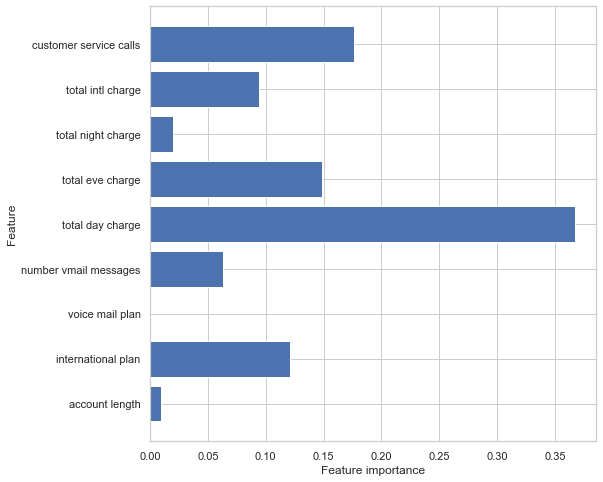

In [114]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [115]:
# Test set predictions
pred = tree_clf.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print('+++++++++++++++++++++++++++++')
print(classification_report(y_test, pred))

[[558   8]
 [ 43  58]]
+++++++++++++++++++++++++++++
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       566
           1       0.88      0.57      0.69       101

    accuracy                           0.92       667
   macro avg       0.90      0.78      0.83       667
weighted avg       0.92      0.92      0.92       667



In [116]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 92.35%


 Tree Ensembles and Random Forest

In [117]:
# Instantiate a BaggingClassifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

In [118]:
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

In [119]:
# Training accuracy score
bagged_tree.score(X_train, y_train)

0.9467366841710427

In [120]:
# Test accuracy score
bagged_tree.score(X_test, y_test)

0.9265367316341829

# Random forest

In [121]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [122]:
# Training accuracy score
forest.score(X_train, y_train)

0.9396099024756189

In [123]:
# Test accuracy score
forest.score(X_test, y_test)

0.9175412293853074

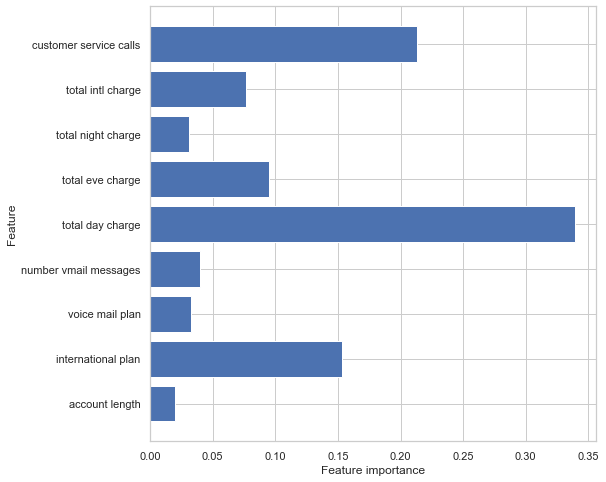

In [124]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(forest)

In [125]:
# Instantiate and fit a RandomForestClassifier with different hyperparameters
forest_2 = RandomForestClassifier(max_depth= 2,n_estimators = 5, max_features= 7)
forest_2.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, max_features=7, n_estimators=5)

In [126]:
# Accessing the first decision tree estimator from the random forest
forest_2.estimators_[0]


DecisionTreeClassifier(max_depth=2, max_features=7, random_state=853648501)

# Gradient Boosting

In [128]:
# Instantiate an AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(random_state=42)

# Instantiate an GradientBoostingClassifier
gbt_clf = GradientBoostingClassifier(random_state=42)

In [129]:
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [130]:
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [131]:
# AdaBoost model predictions
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)

# GradientBoosting model predictions
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

In [132]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_acc_and_f1_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

Training Metrics
Model: AdaBoost
Accuracy: 0.8859714928732183
F1-Score: 0.5

Model: Gradient Boosted Trees
Accuracy: 0.9602400600150037
F1-Score: 0.8417910447761193

Testing Metrics
Model: AdaBoost
Accuracy: 0.8770614692653673
F1-Score: 0.4675324675324675

Model: Gradient Boosted Trees
Accuracy: 0.9340329835082459
F1-Score: 0.7500000000000001


In [133]:
adaboost_confusion_matrix = confusion_matrix(y_test, adaboost_test_preds)
adaboost_confusion_matrix

array([[549,  17],
       [ 65,  36]], dtype=int64)

In [134]:
gbt_confusion_matrix = confusion_matrix(y_test, gbt_clf_test_preds)
gbt_confusion_matrix

array([[557,   9],
       [ 35,  66]], dtype=int64)

In [135]:
adaboost_classification_report = classification_report(y_test, adaboost_test_preds)
print(adaboost_classification_report)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       566
           1       0.68      0.36      0.47       101

    accuracy                           0.88       667
   macro avg       0.79      0.66      0.70       667
weighted avg       0.86      0.88      0.86       667



In [136]:
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       566
           1       0.88      0.65      0.75       101

    accuracy                           0.93       667
   macro avg       0.91      0.82      0.86       667
weighted avg       0.93      0.93      0.93       667



In [137]:
print('Mean Adaboost Cross-Val Score (k=5):')
print(cross_val_score(adaboost_clf, X_train, y_train, cv=5).mean())


Mean Adaboost Cross-Val Score (k=5):
0.8690951507613607


In [138]:
print('Mean GBT Cross-Val Score (k=5):')
print(cross_val_score(gbt_clf, X_train, y_train, cv=5).mean())


Mean GBT Cross-Val Score (k=5):
0.9339833182255763


# XGBoost

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [140]:
y_train.value_counts().sort_index()

churn
0        2141
1         358
dtype: int64

In [141]:
y_test.value_counts().sort_index()

churn
0        709
1        125
dtype: int64

classification categories are integer and count up from 0 so we are good

In [142]:
# Instantiate XGBClassifier
clf = XGBClassifier()

# Fit XGBClassifier
clf.fit(X_train, y_train)

# Predict on training and test sets
training_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 100.0%
Validation accuracy: 94.0%


let's choose tunable parameters.

In [143]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

now I will create GridSearchCV object to use iteratively tune XGBoost model

In [144]:
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 6
min_child_weight: 2
n_estimators: 100
subsample: 0.7

Training Accuracy: 97.72%
Validation accuracy: 93.41%


# Pipeline all Models

Let's define pipeline for each classifier with needed preprocesing steps feature scaling using StandardScaler and oversampling using SMOTE

In [145]:
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('smote', SMOTE(random_state=42)),
                    ('LR', LogisticRegression(random_state=42))])
pipe_dt = Pipeline([('scl', StandardScaler()),
                    ('smote', SMOTE(random_state=42)),
                    ('DT',DecisionTreeClassifier(random_state=42))])
pipe_rf = Pipeline([('scl', StandardScaler()),
                    ('smote', SMOTE(random_state=42)),
                    ('RF',RandomForestClassifier(random_state=42))])
pipe_knn = Pipeline([('scl', StandardScaler()),
                     ('smote', SMOTE(random_state=42)),
                    ('KNN', KNeighborsClassifier())])
pipe_xgb = Pipeline([('scl', StandardScaler()),
                     ('smote', SMOTE(random_state=42)),
                     ('XGB', XGBClassifier(random_state=42))])

Defining parameter grids for hyperparameter tuning for each classifier.



In [146]:
param_range = [1, 2, 3, 4, 5, 6]
param_range_fl = [1.0, 0.5, 0.1]
n_estimators = [50,100,150]
learning_rates = [.1,.2,.3]
lr_param_grid = [{ 'LR__penalty': ['l1', 'l2'],
                   'LR__C': param_range_fl,
                   'LR__solver': ['liblinear']}]
dt_param_grid = [{ 'DT__criterion': ['gini', 'entropy'],
                   'DT__min_samples_leaf': param_range,
                   'DT__max_depth': param_range,
                   'DT__min_samples_split': param_range[1:]}]
rf_param_grid = [{ 'RF__min_samples_leaf': param_range,
                   'RF__max_depth': param_range,
                   'RF__min_samples_split': param_range[1:]}]
knn_param_grid = [{'KNN__n_neighbors': param_range,
                   'KNN__weights': ['uniform', 'distance'],
                   'KNN__metric': ['euclidean', 'manhattan']}]
xgb_param_grid = [{'XGB__learning_rate': learning_rates,
                    'XGB__max_depth': param_range,
                    'XGB__min_child_weight': param_range[:2],
                    'XGB__subsample': param_range_fl,
                    'XGB__n_estimators': n_estimators}]

Let's perform gridsearch to find the best hyperparameters for each classifier in their separate pipeline.
The evaluation metric used is accuracy.
Cross_validation is performing using 3 folds

In [147]:
lr_grid_search = GridSearchCV(estimator=pipe_lr,
                              param_grid=lr_param_grid,
                              scoring='accuracy',
                              cv=3)
dt_grid_search = GridSearchCV(estimator=pipe_dt,
                              param_grid=dt_param_grid,
                              scoring='accuracy',
                              cv=3)
rf_grid_search = GridSearchCV(estimator=pipe_rf,
                              param_grid=rf_param_grid,
                              scoring='accuracy',
                              cv=3)
knn_grid_search = GridSearchCV(estimator=pipe_knn,
                               param_grid=knn_param_grid,
                               scoring='accuracy',
                               cv=3)
xgb_grid_search = GridSearchCV(estimator=pipe_xgb,
                               param_grid=xgb_param_grid,
                               scoring='accuracy',
                               cv=3)

In [148]:
grids = [lr_grid_search, dt_grid_search, rf_grid_search, knn_grid_search, xgb_grid_search]   

for pipe in grids:
    pipe.fit(X_train,y_train)

In [1018]:
grid_dict = {0: 'Logistic Regression', 
             1: 'Decision Trees', 
             2: 'Random Forest', 
             3: 'K-Nearest Neighbors', 
             4: 'XGBoost'}

for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(grid_dict[i], model.score(X_test,y_test)))
    print('{} Best Params: {}'.format(grid_dict[i], model.best_params_))
    print('______________________________________________________')

Logistic Regression Test Accuracy: 0.7811094452773614
Logistic Regression Best Params: {'LR__C': 0.1, 'LR__penalty': 'l1', 'LR__solver': 'liblinear'}
______________________________________________________
Decision Trees Test Accuracy: 0.8605697151424287
Decision Trees Best Params: {'DT__criterion': 'entropy', 'DT__max_depth': 6, 'DT__min_samples_leaf': 4, 'DT__min_samples_split': 2}
______________________________________________________
Random Forest Test Accuracy: 0.8770614692653673
Random Forest Best Params: {'RF__max_depth': 6, 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 4}
______________________________________________________
K-Nearest Neighbors Test Accuracy: 0.8860569715142429
K-Nearest Neighbors Best Params: {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 2, 'KNN__weights': 'uniform'}
______________________________________________________
XGBoost Test Accuracy: 0.9340329835082459
XGBoost Best Params: {'XGB__learning_rate': 0.1, 'XGB__max_depth': 6, 'XGB__min_child_weig

## Best Model

# KNN

In [149]:
# entering best model found during grid search for the K-Nearest Neighbors pipeline
knn_grid_search.best_estimator_

Pipeline(steps=[('scl', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('KNN',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=2))])

In [150]:
# assigning best knn model to variable
best_knn = knn_grid_search.best_estimator_

In [151]:
# best parameter values during selected during grid search
knn_grid_search.best_params_

{'KNN__metric': 'manhattan', 'KNN__n_neighbors': 2, 'KNN__weights': 'uniform'}

we got dictionary with best parameters

In [152]:
# predicting the labels for test data and assigning it to variable
y_pred_knn = best_knn.predict(X_test)

In [153]:
confusion_matrix(y_test, y_pred_knn)

array([[658,  51],
       [ 53,  72]], dtype=int64)

In [154]:
# accessing steps for the best knn 
knn_grid_search.best_estimator_.named_steps

{'scl': StandardScaler(),
 'smote': SMOTE(random_state=42),
 'KNN': KNeighborsClassifier(metric='manhattan', n_neighbors=2)}

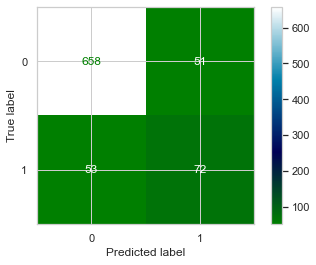

In [155]:
cm=confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(cm).plot(cmap='ocean')

# Decission Tree

In [156]:
# entering best model found during grid search for the Decision Tree pipeline

dt_grid_search.best_estimator_

Pipeline(steps=[('scl', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('DT',
                 DecisionTreeClassifier(criterion='entropy', max_depth=6,
                                        min_samples_leaf=4, random_state=42))])

In [157]:
# assigning best Decision Tree model to variable

best_dt = dt_grid_search.best_estimator_

In [158]:
# best parameter values during selected during grid search

dt_grid_search.best_params_

{'DT__criterion': 'entropy',
 'DT__max_depth': 6,
 'DT__min_samples_leaf': 4,
 'DT__min_samples_split': 2}

In [159]:
# accessing steps for the best Decission Tree 

dt_grid_search.best_estimator_.named_steps

{'scl': StandardScaler(),
 'smote': SMOTE(random_state=42),
 'DT': DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=4,
                        random_state=42)}

In [160]:
# returning importance score of each feature
dt_grid_search.best_estimator_.named_steps['DT'].feature_importances_

array([0.00913197, 0.22180887, 0.        , 0.05144219, 0.31746513,
       0.10285704, 0.0082884 , 0.04434847, 0.24465793])

In [161]:
# predicting the labels for test data and assigning it to variable

y_pred_dt = best_dt.predict(X_test)

In [162]:
confusion_matrix(y_test, y_pred_dt)

array([[628,  81],
       [ 31,  94]], dtype=int64)

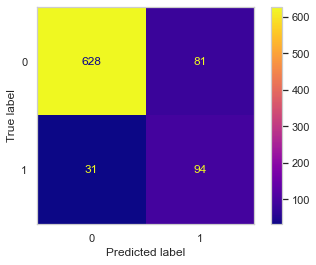

In [163]:
# plotting confusion matrix
fig, ax = plt.subplots()

cm=confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(cm)
disp = disp.plot(include_values = True, ax =ax,  cmap = 'plasma' )
plt.grid(False)
plt.show()

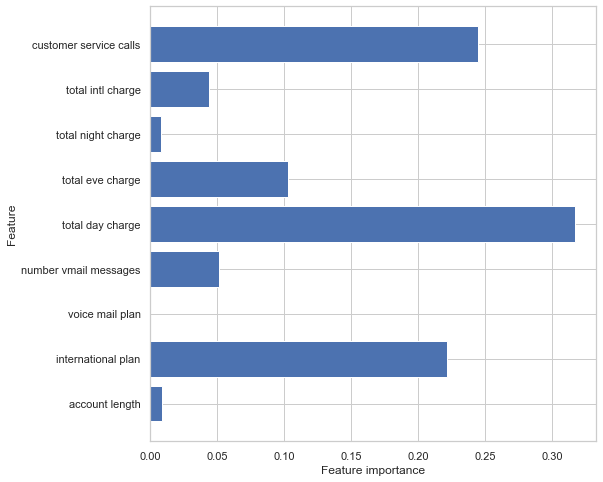

In [164]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.named_steps['DT'].feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(best_dt)

In [165]:
accuracy_score(y_test, y_pred_dt)

0.8657074340527577

In [166]:
precision_score(y_test, y_pred_dt)

0.5371428571428571

In [167]:
recall_score(y_test, y_pred_dt)

0.752

In [168]:
f1_score(y_test, y_pred_dt)

0.6266666666666666

In [169]:
print('Accuracy:', accuracy_score(y_test, y_pred_dt) )
print('Precision:', precision_score(y_test, y_pred_dt))
print('Recall:' , recall_score(y_test, y_pred_dt))
print('f1_score:', f1_score(y_test, y_pred_dt))

Accuracy: 0.8657074340527577
Precision: 0.5371428571428571
Recall: 0.752
f1_score: 0.6266666666666666


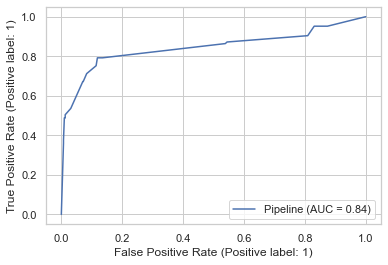

In [170]:
# plotting Receiver Operating Characteristic curve
plot_roc_curve(best_dt, X_test, y_test)

# XGBoost

In [171]:
# entering best model found during grid search for the Decision Tree pipeline

xgb_grid_search.best_estimator_

Pipeline(steps=[('scl', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('XGB',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                              

In [172]:
# assigning best Decision Tree model to variable

best_xgb = xgb_grid_search.best_estimator_

In [173]:
# best parameter values during selected during grid search

xgb_grid_search.best_params_

{'XGB__learning_rate': 0.1,
 'XGB__max_depth': 6,
 'XGB__min_child_weight': 1,
 'XGB__n_estimators': 150,
 'XGB__subsample': 1.0}

In [174]:
# accessing steps for the best Decission Tree 

xgb_grid_search.best_estimator_.named_steps

{'scl': StandardScaler(),
 'smote': SMOTE(random_state=42),
 'XGB': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=6, max_leaves=None,
               min_child_weight=1, missing=nan, monotone_constraints=None,
               n_estimators=150, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=42, ...)}

In [175]:
# returning importance score of each feature

xgb_grid_search.best_estimator_.named_steps['XGB'].feature_importances_

array([0.0345906 , 0.29492652, 0.17033282, 0.04495632, 0.11842749,
       0.05481599, 0.03974598, 0.03712445, 0.20507975], dtype=float32)

In [176]:
# predicting the labels for test data and assigning it to variable

y_pred_xgb = best_xgb.predict(X_test)

In [177]:
confusion_matrix(y_test, y_pred_xgb)

array([[687,  22],
       [ 32,  93]], dtype=int64)

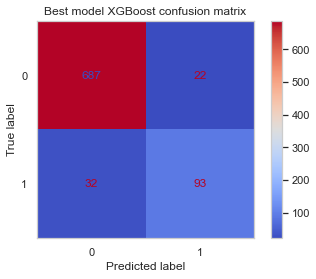

In [178]:
fig, ax = plt.subplots()

cm=confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(cm)
disp = disp.plot(include_values = True, ax =ax, cmap = 'coolwarm')
ax.set_title('Best model XGBoost confusion matrix')
plt.grid(False)
plt.show()

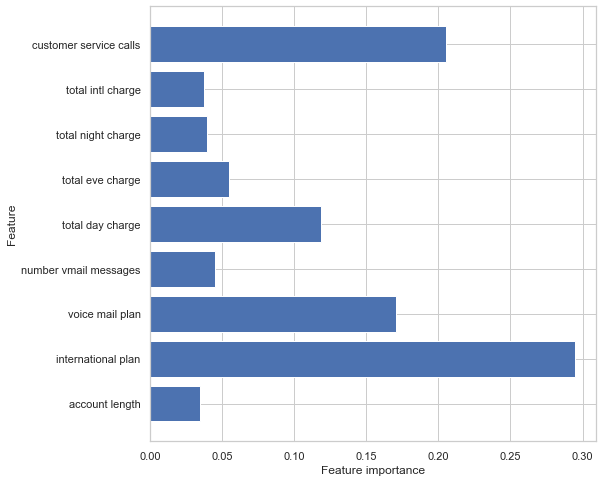

In [179]:

def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.named_steps['XGB'].feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(best_xgb)

In [180]:
accuracy_score(y_test, y_pred_xgb)

0.935251798561151

In [181]:
precision_score(y_test, y_pred_xgb)

0.808695652173913

In [182]:
recall_score(y_test, y_pred_xgb)

0.744

In [183]:
f1_score(y_test, y_pred_xgb)

0.775

In [184]:
print('Accuracy:', accuracy_score(y_test, y_pred_xgb) )
print('Precision:', precision_score(y_test, y_pred_xgb))
print('Recall:' , recall_score(y_test, y_pred_xgb))
print('f1_score:', f1_score(y_test, y_pred_xgb))

Accuracy: 0.935251798561151
Precision: 0.808695652173913
Recall: 0.744
f1_score: 0.775


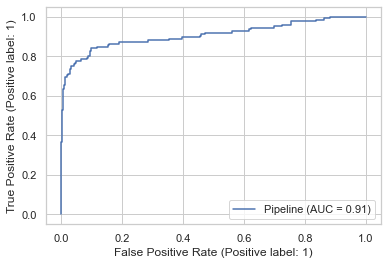

In [185]:
# plotting Receiver Operating Characteristic curve

plot_roc_curve(best_xgb, X_test, y_test)